In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv('/content/medical_insurance_dataset.csv')




In [ ]:
df.head()  # Display first 5 rows

,age,sex,BMI,children,smoker,region,charges,employee_salary
0,43,male,33.1,0,no,southwest,41976.39,55527.21
1,31,male,27.6,1,no,southwest,38555.00,42360.74
2,34,female,34.6,4,no,northeast,16315.52,89500.26
3,18,female,38.8,3,no,northeast,49838.44,118399.19
4,38,male,39.6,5,yes,northwest,42724.29,51085.96


In [ ]:
#check bottom rows
df.tail()

,age,sex,BMI,children,smoker,region,charges,employee_salary
95,43,female,31.7,4,yes,northeast,2174.43,98210.94
96,61,female,24.0,1,no,northwest,5927.74,88746.77
97,19,male,25.0,2,no,northeast,22144.71,79444.75
98,54,female,26.5,5,no,southeast,15948.42,53913.02
99,38,male,30.3,2,yes,northwest,36204.59,108424.44


In [ ]:
# Step 3: View dataset shape (rows & columns)
df.shape


(100, 8)

In [ ]:
# View column names
print("Column Names:", df.columns.tolist())

Column Names: ['age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges', 'employee_salary']


In [ ]:
# View dataset info (data types, missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              100 non-null    int64  
 1   sex              100 non-null    object 
 2   BMI              100 non-null    float64
 3   children         100 non-null    int64  
 4   smoker           100 non-null    object 
 5   region           100 non-null    object 
 6   charges          100 non-null    float64
 7   employee_salary  100 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.4+ KB


In [ ]:
#chceck for duplicates
df.describe()

,age,BMI,children,charges,employee_salary
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,42.630000,28.040000,2.420000,25333.190800,77461.490100
std,13.135391,6.376108,1.694793,13922.135003,23919.460251
min,18.000000,18.600000,0.000000,2095.880000,30101.950000
25%,33.000000,22.400000,1.000000,14060.270000,54053.097500
50%,43.000000,27.500000,2.000000,26253.265000,79958.605000
75%,52.000000,33.175000,4.000000,36402.412500,98385.727500
max,65.000000,39.600000,5.000000,49838.440000,118399.190000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'employee_salary'],
      dtype='object')

In [ ]:
#Check for missing values
print("Missing Values in Dataset:\n", df.isnull().sum())


Missing Values in Dataset:
 age                0
sex                0
BMI                0
children           0
smoker             0
region             0
charges            0
employee_salary    0
dtype: int64


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
BMI,0
children,0
smoker,0
region,0
charges,0
employee_salary,0


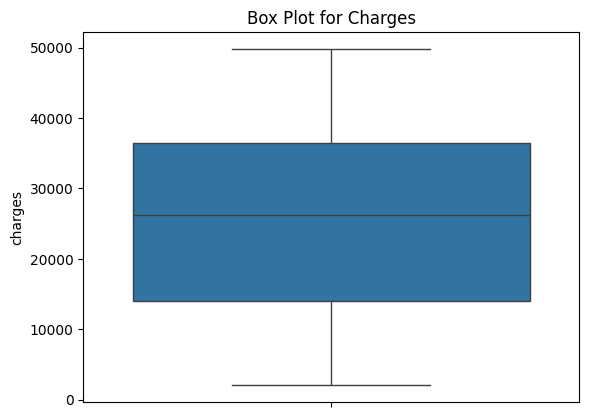

In [ ]:
#detect outliers
sns.boxplot(df['charges'])
plt.title('Box Plot for Charges')
plt.show()


In [ ]:
# Remove outliers using IQR method
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

data = df[(df['charges'] >= Q1 - 1.5 * IQR) & (df['charges'] <= Q3 + 1.5 * IQR)]



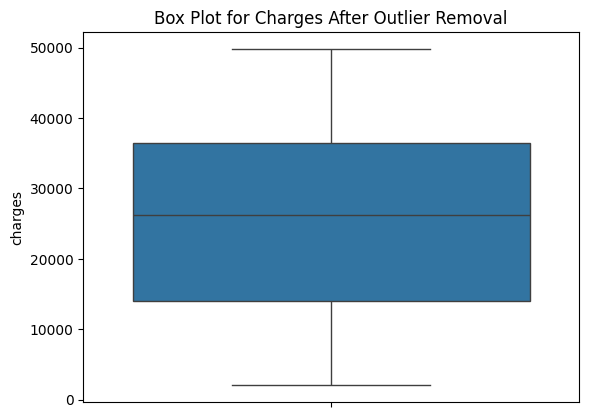

In [ ]:
#Box Plot After Outlier Removal
sns.boxplot(df['charges'])
plt.title('Box Plot for Charges After Outlier Removal')
plt.show()


In [ ]:
# Encode Categorical Variables
label_encoders = {}
for col in ['sex', 'smoker']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le




In [ ]:
# One-Hot Encoding for 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,BMI,children,smoker,charges,employee_salary,region_northwest,region_southeast,region_southwest
0,43,1,33.1,0,0,41976.39,55527.21,False,False,True
1,31,1,27.6,1,0,38555.00,42360.74,False,False,True
2,34,0,34.6,4,0,16315.52,89500.26,False,False,False
3,18,0,38.8,3,0,49838.44,118399.19,False,False,False
4,38,1,39.6,5,1,42724.29,51085.96,True,False,False


In [ ]:
# Step 5: Check correlations between features
correlation_matrix = df.corr()

# Display correlation matrix
print("Feature Correlations:\n", correlation_matrix)



Feature Correlations:
                        age       sex       BMI  children    smoker   charges  \
age               1.000000  0.027935 -0.032843  0.034729 -0.057658 -0.184965   
sex               0.027935  1.000000  0.190943 -0.318585 -0.057750  0.069986   
BMI              -0.032843  0.190943  1.000000  0.145371  0.108389  0.131636   
children          0.034729 -0.318585  0.145371  1.000000  0.074379 -0.022887   
smoker           -0.057658 -0.057750  0.108389  0.074379  1.000000  0.078203   
charges          -0.184965  0.069986  0.131636 -0.022887  0.078203  1.000000   
employee_salary  -0.041029  0.005571 -0.078471 -0.182720 -0.119178 -0.038297   
region_northwest  0.029624 -0.094353 -0.069814 -0.055617  0.153969  0.110699   
region_southeast -0.034486  0.043282 -0.068808 -0.084686  0.013990 -0.104712   
region_southwest  0.103686  0.104828  0.130364  0.031058 -0.179262  0.054683   

                  employee_salary  region_northwest  region_southeast  \
age                    

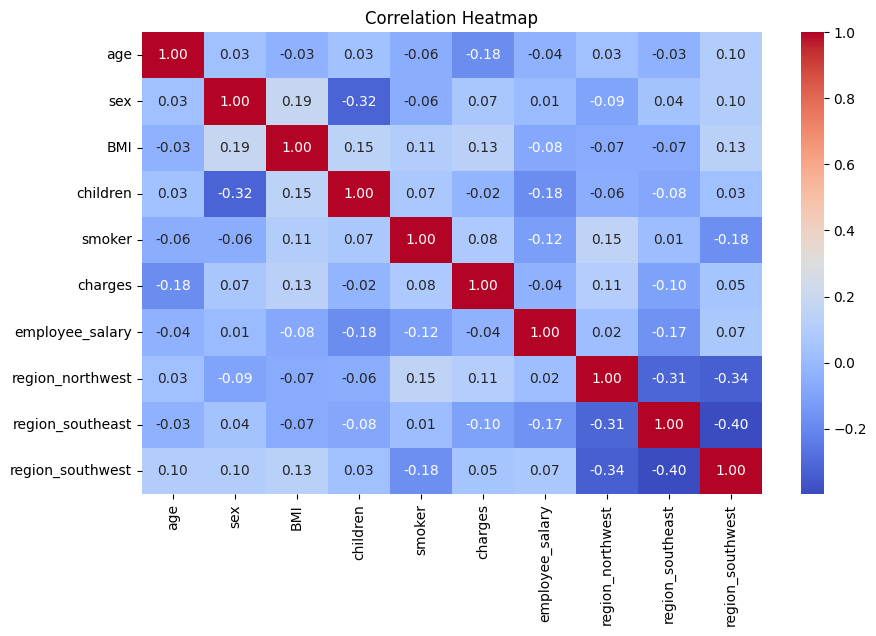

In [ ]:
# Visualize correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


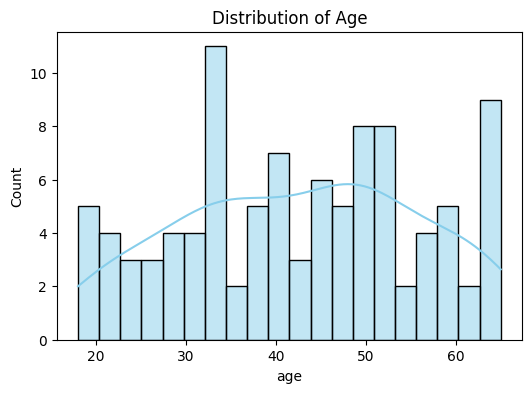

<ipython-input-101-77f6c0f21c7e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age', y='charges', data=df, palette="Set2")


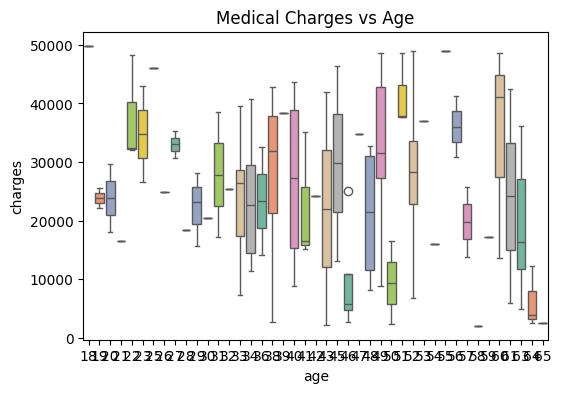

In [ ]:
# Distribution of Age
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, color="skyblue", bins=20)
plt.title('Distribution of Age')
plt.show()

# Box Plot for Age vs Charges
plt.figure(figsize=(6, 4))
sns.boxplot(x='age', y='charges', data=df, palette="Set2")
plt.title('Medical Charges vs Age')
plt.show()


<ipython-input-102-020fca0b0fef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="pastel")


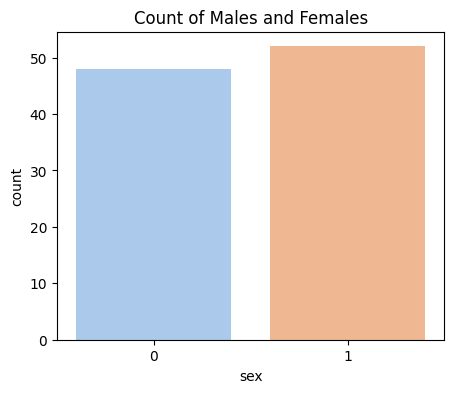

<ipython-input-102-020fca0b0fef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette="Set3")


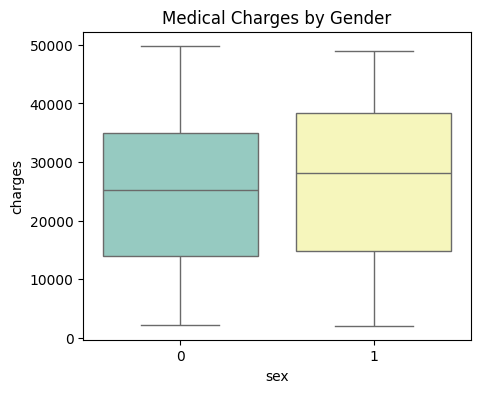

In [ ]:
# Count Plot for Sex
plt.figure(figsize=(5, 4))
sns.countplot(x='sex', data=df, palette="pastel")
plt.title('Count of Males and Females')
plt.show()

# Box Plot for Charges by Sex
plt.figure(figsize=(5, 4))
sns.boxplot(x='sex', y='charges', data=df, palette="Set3")
plt.title('Medical Charges by Gender')
plt.show()


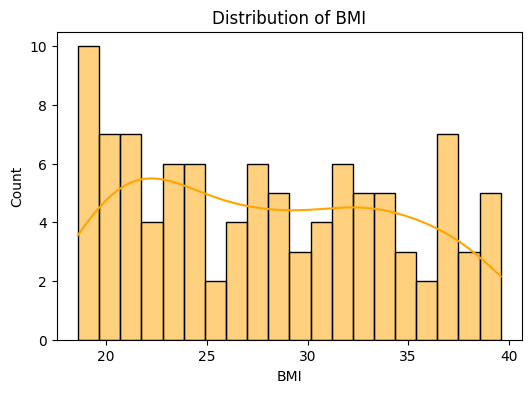

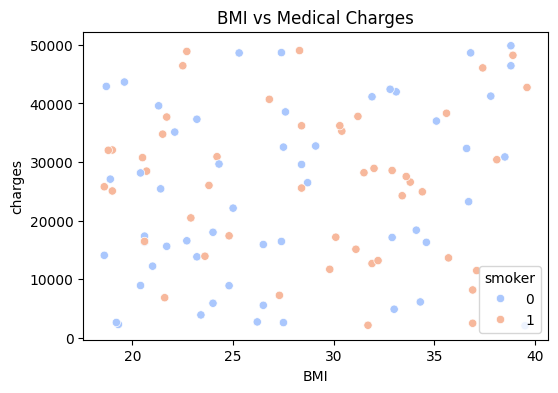

In [ ]:
# Distribution of BMI
plt.figure(figsize=(6, 4))
sns.histplot(df['BMI'], kde=True, color="orange", bins=20)
plt.title('Distribution of BMI')
plt.show()

# Scatter Plot for BMI vs Charges
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='charges', hue='smoker', data=df, palette="coolwarm")
plt.title('BMI vs Medical Charges')
plt.show()


<ipython-input-104-a23ad742d6f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df, palette="pastel")


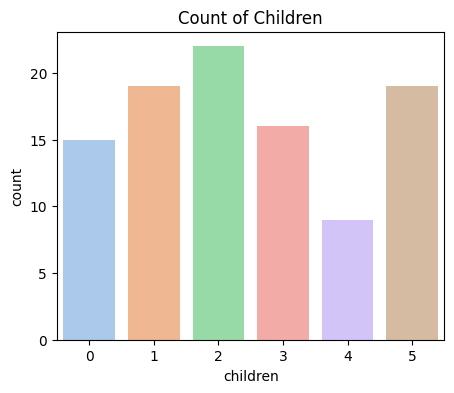

<ipython-input-104-a23ad742d6f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='children', y='charges', data=df, palette="Set1")


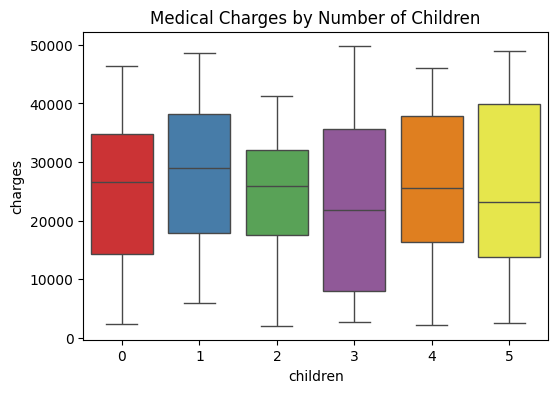

In [ ]:
# Count Plot for Children
plt.figure(figsize=(5, 4))
sns.countplot(x='children', data=df, palette="pastel")
plt.title('Count of Children')
plt.show()

# Box Plot for Charges by Number of Children
plt.figure(figsize=(6, 4))
sns.boxplot(x='children', y='charges', data=df, palette="Set1")
plt.title('Medical Charges by Number of Children')
plt.show()


<ipython-input-105-09da660277be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette="Set2")


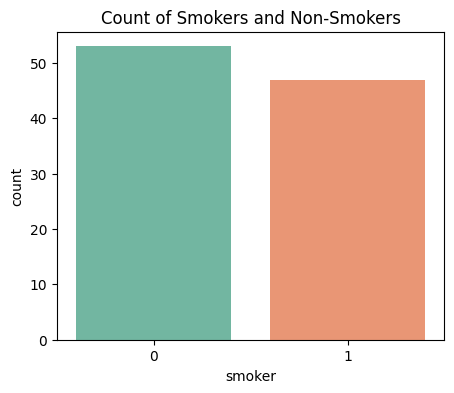

<ipython-input-105-09da660277be>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette="Set3")


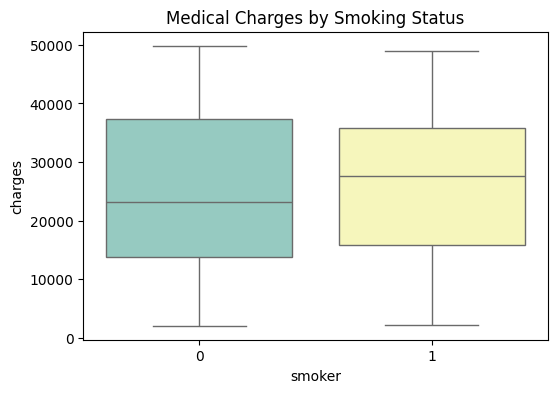

In [ ]:
# Count Plot for Smoker
plt.figure(figsize=(5, 4))
sns.countplot(x='smoker', data=df, palette="Set2")
plt.title('Count of Smokers and Non-Smokers')
plt.show()

# Box Plot for Charges by Smoker Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df, palette="Set3")
plt.title('Medical Charges by Smoking Status')
plt.show()


<ipython-input-106-33d3670973a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[['region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1), data=df, palette="pastel")


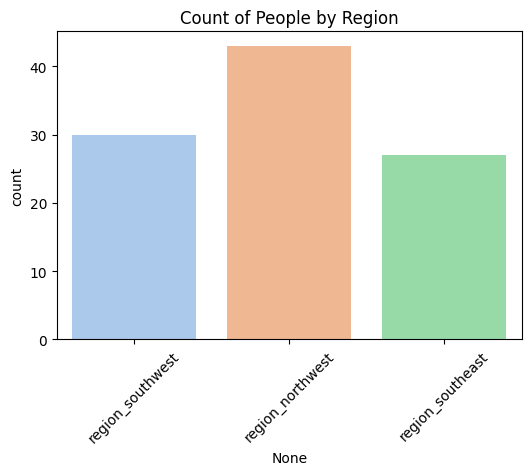

In [ ]:
# Count Plot for Region
plt.figure(figsize=(6, 4))
# Use the one-hot encoded columns instead of 'region'
sns.countplot(x=df[['region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1), data=df, palette="pastel")
plt.title('Count of People by Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

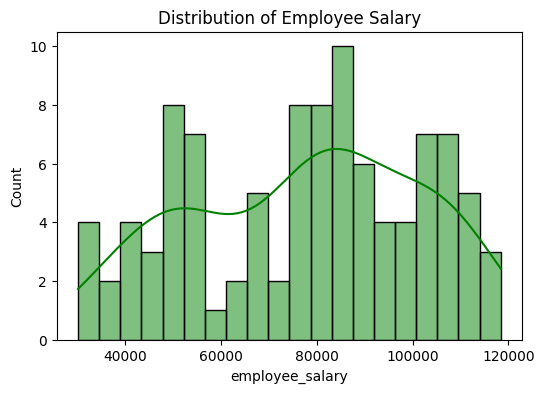

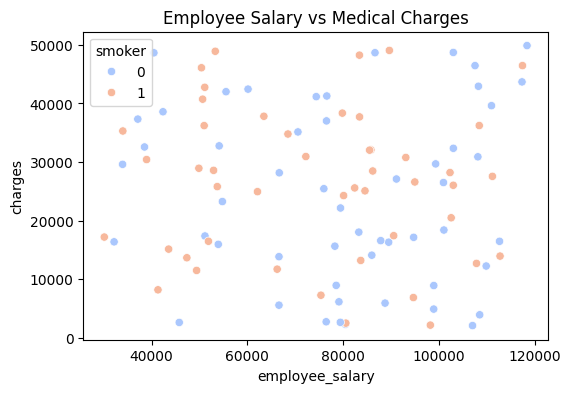

In [ ]:
# Distribution of Employee Salary
plt.figure(figsize=(6, 4))
sns.histplot(df['employee_salary'], kde=True, color="green", bins=20)
plt.title('Distribution of Employee Salary')
plt.show()

# Scatter Plot for Salary vs Charges
plt.figure(figsize=(6, 4))
sns.scatterplot(x='employee_salary', y='charges', hue='smoker', data=df, palette="coolwarm")
plt.title('Employee Salary vs Medical Charges')
plt.show()


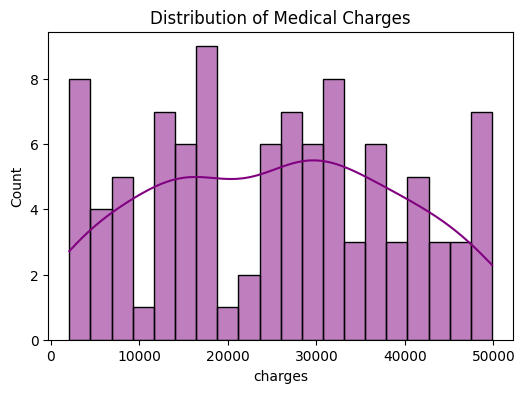

<ipython-input-108-42c8e7f829b2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='charges', data=df, palette="Set2")


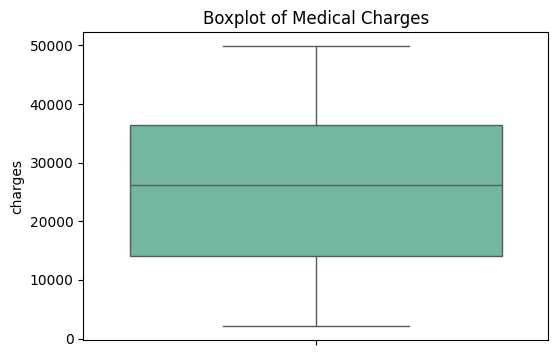

In [ ]:
# Distribution of Charges
plt.figure(figsize=(6, 4))
sns.histplot(df['charges'], kde=True, color="purple", bins=20)
plt.title('Distribution of Medical Charges')
plt.show()

# Box Plot for Charges
plt.figure(figsize=(6, 4))
sns.boxplot(y='charges', data=df, palette="Set2")
plt.title('Boxplot of Medical Charges')
plt.show()


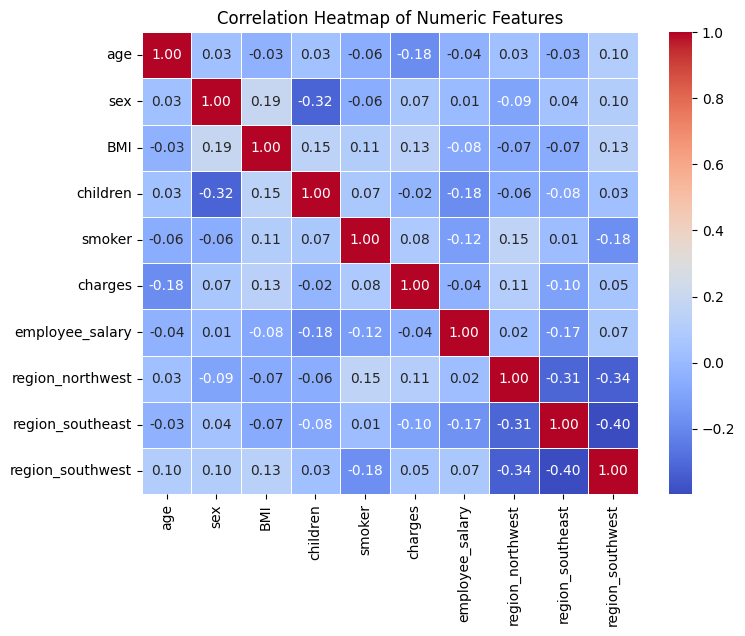

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [ ]:
#feature engineerning
#extract features
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 100], labels=['Child', 'Young', 'Middle Age', 'Senior'])


In [ ]:
#Select Features
data['bmi_salary_interaction'] = data['BMI'] * data['employee_salary']


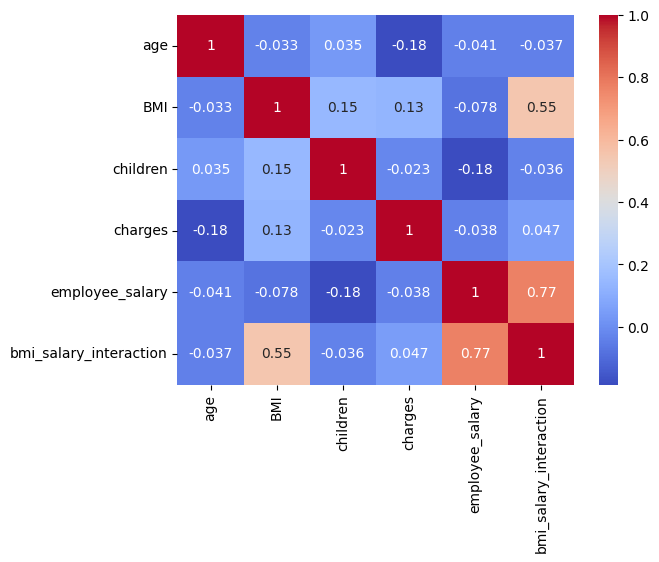

In [ ]:
#Check Multicollinearity
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


In [ ]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the features for VIF calculation
features = data.select_dtypes(include=np.number).columns.tolist()  # Select numerical features
# Remove the target variable if it's in the list
features.remove('charges') # Assuming 'charges' is your target

vif = pd.DataFrame()
vif["Feature"] = data[features].columns
vif["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
vif

,Feature,VIF
0,age,10.874704
1,BMI,22.965994
2,children,3.155308
3,employee_salary,27.837913
4,bmi_salary_interaction,38.135700


In [ ]:
#One-hot encoding
data = pd.get_dummies(data, drop_first=True)


In [ ]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])


In [ ]:
# Split Data
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target Variable




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#linear regression
lr_model = LinearRegression()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MAE: 11829.506237584048
MSE: 199516102.81716585
R2 Score: -0.26050134342140185


In [ ]:
#decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regressor:
MAE: 15633.641499999998
MSE: 345901947.636145
R2 Score: -1.1853367398971018


In [ ]:
#random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
MAE: 11448.845280000003
MSE: 173698146.61441967
R2 Score: -0.09738885265779174


In [ ]:
#support vector regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

print("Support Vector Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regressor:
MAE: 10878.03915440415
MSE: 161732999.98213664
R2 Score: -0.02179553867827866


In [ ]:
#Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict with Gradient Boosting
gb_pred = gb_model.predict(X_test)
# Evaluate Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting - MAE: {gb_mae:.2f}, MSE: {gb_mse:.2f}, R2: {gb_r2:.2f}")


Gradient Boosting - MAE: 11541.19, MSE: 178811680.32, R2: -0.13


In [ ]:
# Train KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict with KNN
knn_pred = knn_model.predict(X_test)

# Evaluate KNN
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print(f"KNN - MAE: {knn_mae:.2f}, MSE: {knn_mse:.2f}, R2: {knn_r2:.2f}")

KNN - MAE: 11293.15, MSE: 161973501.33, R2: -0.02


In [ ]:
# Define hyperparameters for all models
param_grid = {
    'Linear Regression': (LinearRegression(), {}),

    'SVM': (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),

    'Decision Tree': (DecisionTreeRegressor(), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),

    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),

    'Gradient Boosting': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }),

    'KNN': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    })
}



In [ ]:
from sklearn.model_selection import GridSearchCV
# Dictionary to store best models and scores
best_models = {}

# Run GridSearchCV for each model
for name, (model, params) in param_grid.items():
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = {
        'Best Model': grid.best_estimator_,
        'MAE': mean_absolute_error(y_test, grid.best_estimator_.predict(X_test)),
        'MSE': mean_squared_error(y_test, grid.best_estimator_.predict(X_test)),
        'R2': r2_score(y_test, grid.best_estimator_.predict(X_test))
    }

best_models

{'Linear Regression': {'Best Model': LinearRegression(),
  'MAE': 11829.506237585436,
  'MSE': 199516102.81721622,
  'R2': -0.26050134342172004},
 'SVM': {'Best Model': SVR(C=10),
  'MAE': 10878.582795739017,
  'MSE': 161751341.2643655,
  'R2': -0.02191141509408201},
 'Decision Tree': {'Best Model': DecisionTreeRegressor(max_depth=3, min_samples_split=10),
  'MAE': 11900.184732614942,
  'MSE': 208651245.8585042,
  'R2': -0.3182152818622792},
 'Random Forest': {'Best Model': RandomForestRegressor(max_depth=5, n_estimators=50),
  'MAE': 10372.702508718747,
  'MSE': 145634196.94711924,
  'R2': 0.07991335883217365},
 'Gradient Boosting': {'Best Model': GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=50),
  'MAE': 11878.206976349653,
  'MSE': 188582759.43635756,
  'R2': -0.19142674831352968},
 'KNN': {'Best Model': KNeighborsRegressor(metric='euclidean', n_neighbors=10),
  'MAE': 10086.13425,
  'MSE': 142125891.00241035,
  'R2': 0.102078107912559}}

In [ ]:
models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'SVM': svr_model,
    'Gradient Boosting': gb_model,
    'KNN': knn_model,
}


In [ ]:
# Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('model', model)])
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
    results[name] = np.mean(scores)

# Display results
for model, score in results.items():
    print(f'{model}: {score:.4f}')

Linear Regression: -0.1494
Random Forest: -0.0445
Decision Tree: -0.8214
SVM: -0.0502
Gradient Boosting: -0.2210
KNN: -0.1004


In [ ]:
#model evaluation with test set
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")

Test Set - MAE: 11445.17, MSE: 174533508.55, R2: -0.10


In [ ]:
#feature importance
importances = best_rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

            Feature  Importance
0               age    0.330567
5   employee_salary    0.241810
2               BMI    0.230766
3          children    0.066037
8  region_southwest    0.030611
1               sex    0.027476
6  region_northwest    0.026694
7  region_southeast    0.023498
4            smoker    0.022540
